### Import necessary libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None


### Load Data

In [69]:
df = pd.read_csv(r"F:\Ineuron DS\Assignment\rideshare_kaggle.csv")

In [70]:
## Checking top 5 rows

df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [71]:
## Checking Details Information related with Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [72]:
## Checking Null Values

df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [73]:
## Checking Rows & Columns Availabale in Dataset

df.shape

(693071, 57)

In [74]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

### EDA

In [65]:
# Droping ID column

# We want to prodict the price and location so we Remove the following features 
# Because it has no effect on the price of the trip


drop = ['id','timestamp','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'
                 ,'latitude','longitude','product_id','surge_multiplier']

df.drop(drop,axis = 1,inplace = True)

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '385663 (56%)'), Text(0, 0, '307408 (44%)')]

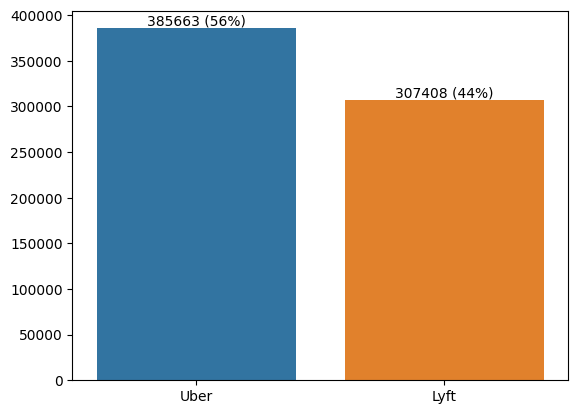

In [75]:
ax = sns.barplot(df['cab_type'].value_counts().index,df['cab_type'].value_counts().values)
abs_values = df['cab_type'].value_counts()
rel_values = df['cab_type'].value_counts(normalize = True).values *100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)

Uber has more rides than Lyft, 56% of rides was for Uber and 44%  for Lyft.

#### Time Analysis

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


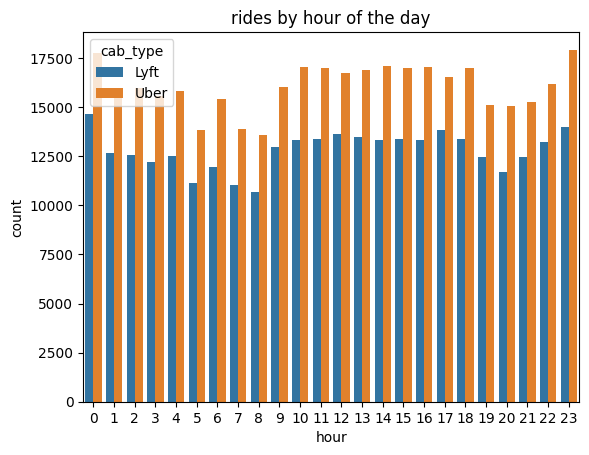

In [76]:
sns.countplot(df['hour'],hue = df['cab_type'])
plt.title("rides by hour of the day")
plt.show()

increase demand for rides in the hours from 10 am to 6 pm for both canb types.

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


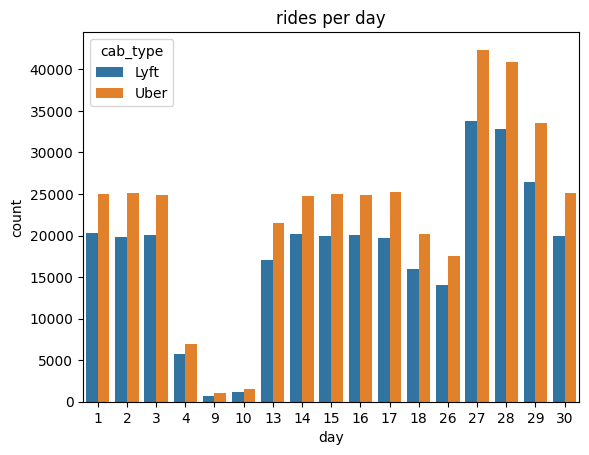

In [77]:
sns.countplot(df['day'],hue = df['cab_type'])
plt.title("rides per day")
plt.show()

As you can see day 27 had the most rides and day 9 had the lowest.

#### Source and Destination Analysis

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


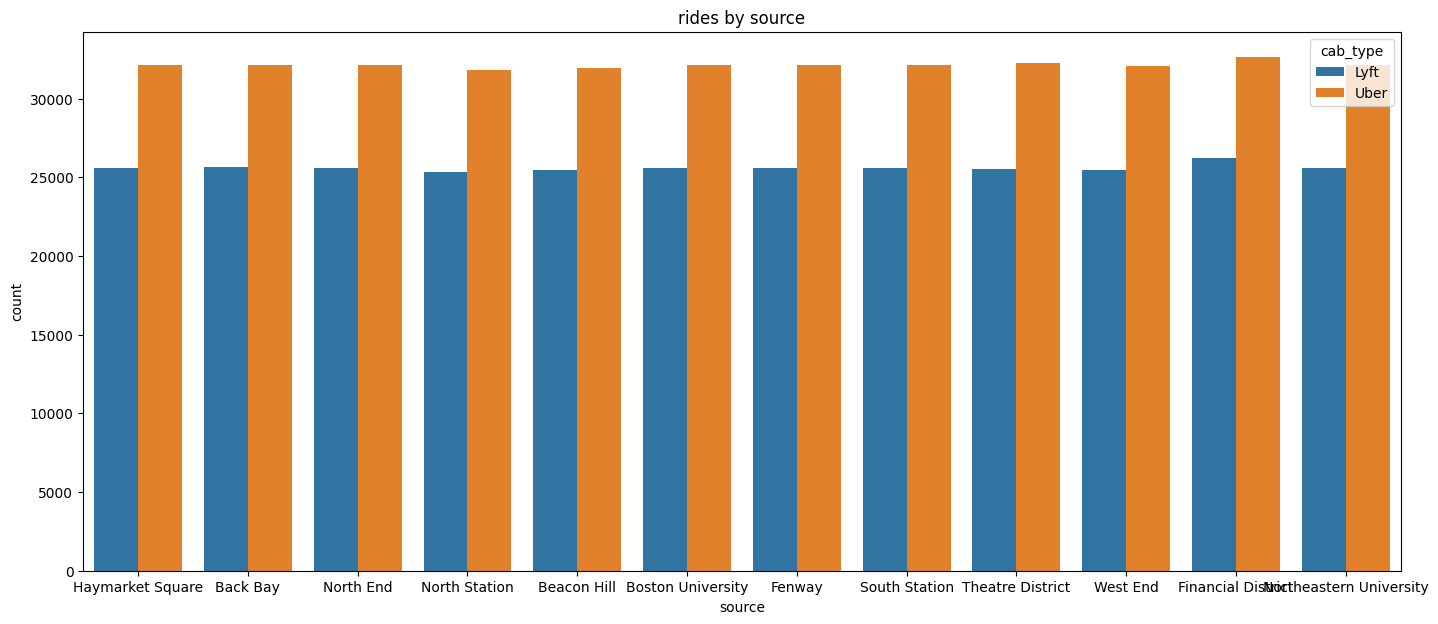

In [78]:
plt.figure(figsize=(17,7))
sns.countplot(df['source'], hue = df['cab_type'])
plt.title("rides by source")
plt.show()

In [79]:
total = df['source'].value_counts().sum()

percentage = (df['source'].value_counts().values/total)*100


As you can see the number of rides is slightly difrrent between pickup points, All pickup points had about 8 percent of the total rides.

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


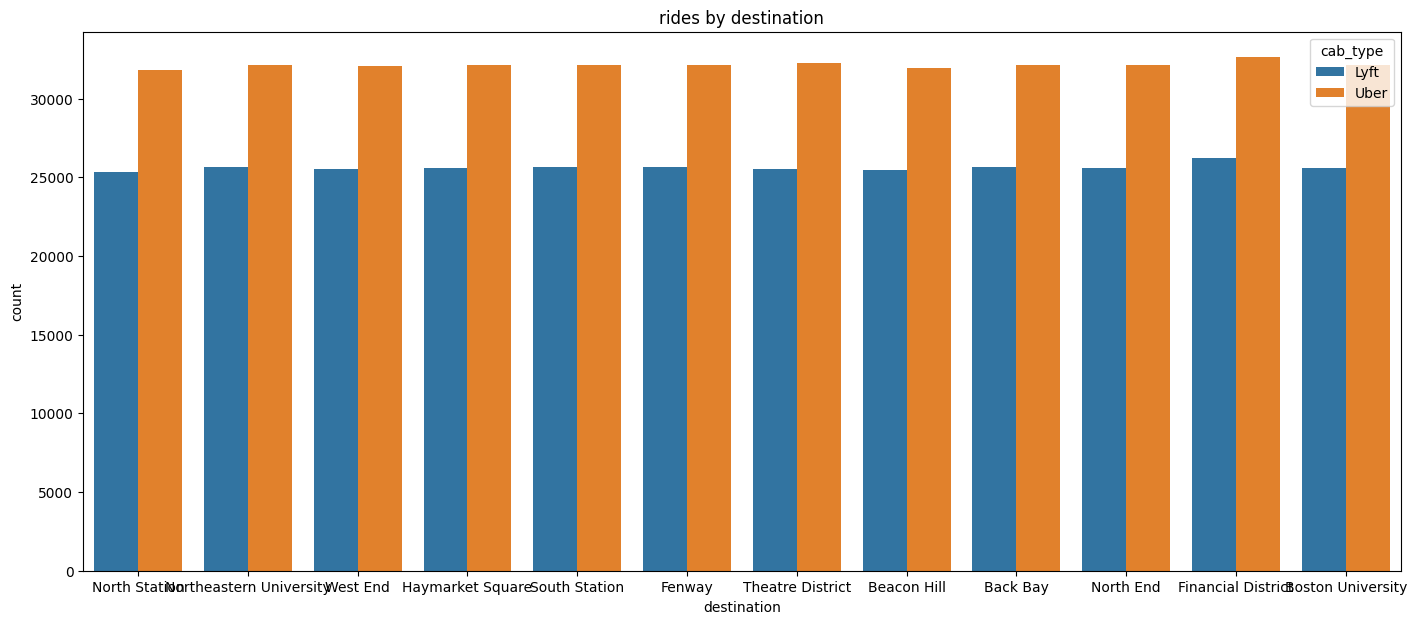

In [80]:
plt.figure(figsize=(17,7))
sns.countplot(df['destination'], hue = df['cab_type'])
plt.title("rides by destination")
plt.show()

In [83]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination             source                                       
Back Bay                Boston University        42.336904 -71.066127
                        Fenway                   42.337840 -71.065812
                        Haymarket Square         42.337070 -71.065139
                        North End                42.338142 -71.066312
                        Northeastern University  42.336810 -71.065419
                        South Station            42.338708 -71.065868
Beacon Hill             Boston University        42.336827 -71.065784
                        Fenway                   42.338942 -71.065757
                        Haymarket Square         42.337337 -71.066054
                        North End                42.338300 -71.065758
                        Northeastern University  42.337259 -71.066089
                        South Station            42.336336 -71.065756
Boston University       Back Bay                 42.337040 -71.065862
                        Beacon Hill              42.339274 -71.066565
                        Financial District       42.339265 -71.066437
                        North Station            42.338337 -71.066188
                        Theatre District         42.338153 -71.066309
                        West End                 42.337502 -71.066244
Fenway                  Back Bay                 42.340084 -71.065859
                        Beacon Hill              42.337819 -71.065550
                        Financial District       42.337213 -71.066292
                        North Station            42.339619 -71.066417
                        Theatre District         42.336492 -71.065439
                        West End                 42.338371 -71.066403
Financial District      Boston University        42.338785 -71.066623
                        Fenway                   42.336937 -71.066036
                        Haymarket Square         42.337749 -71.065840
                        North End                42.338370 -71.065965
                        Northeastern University  42.338274 -71.065928
                        South Station            42.339069 -71.067014
Haymarket Square        Back Bay                 42.339737 -71.066502
                        Beacon Hill              42.337270 -71.066110
                        Financial District       42.337317 -71.066231
                        North Station            42.338259 -71.066023
                        Theatre District         42.338200 -71.065636
                        West End                 42.339017 -71.066281
North End               Back Bay                 42.338519 -71.066157
                        Beacon Hill              42.336807 -71.066220
                        Financial District       42.337784 -71.066134
                        North Station            42.339405 -71.066966
                        Theatre District         42.338820 -71.066752
                        West End                 42.338681 -71.065944
North Station           Boston University        42.338988 -71.066380
                        Fenway                   42.338702 -71.066604
                        Haymarket Square         42.337224 -71.066276
                        North End                42.337599 -71.065857
                        Northeastern University  42.337931 -71.066444
                        South Station            42.336529 -71.065391
Northeastern University Back Bay                 42.338963 -71.066267
                        Beacon Hill              42.338977 -71.065579
                        Financial District       42.337793 -71.066068
                        North Station            42.339839 -71.066534
                        Theatre District         42.338406 -71.065493
                        West End                 42.336766 -71.066227
South Station           Back Bay                 42.338814 -71.065902
                        Beacon Hill              42.338938 -

In [88]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
df1 = df[df['source']=='Haymarket Square']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

Many of the rides are in boston area as we can see that there are 46256 data in that cluster

#### Price Analysis 

In [89]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

In [90]:
print('Maximum price in our data :',df.price.max())
df[df['price']==df.price.max()]

Maximum price in our data : 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,97.5,4.43,2.0,42.3503,-71.081,35.52,35.52,Clear,Light rain in the morning and overnight.,0.0,0.0,0.82,1.85,2.37,1543672800,9.846,44.65,1543690800,34.88,1543712400,43.98,1543690800,35.53,1543712400,clear-night,30.46,1023.52,146,0.12,0,9.846,274.6,1543665335,1543698860,0.82,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


In [91]:
map1 = folium.Map(location=(42.3503,-71.081),zoom_start = 10)
folium.Marker(location=(42.3503,-71.081)).add_to(map1) 
folium.Marker(location=(42.3378,-71.066)).add_to(map1) 
display(map1)

Apparently the 'Financial District - Fenway' route (by lyft) costs 97.5 dollars, which is our maximum price data. But from the map above, the distance between both places is not too far (they are both in boston), so it could be outlier since we don't have information about trip duration or transit. We should check another data with the same route